# Preamble

In [4]:
import sys
#sys.path.insert(0, dir_notebook)

from my_units import *
from functions_model import * 
from functions_load import *
from functions_yellin import *

In [5]:
dir_home = '/mnt/home/kvantilburg/'
dir_ceph = dir_home+'ceph/luminous-basin/'

In [517]:
dir_home = '/mnt/home/kvantilburg/'
dir_ceph = dir_home+'ceph/LuminousBasin/'
dir_events = dir_ceph+'mocks/event_lists/'
dir_source = dir_ceph+'data/products_80610202001_orbit1_chu12_spatialARF/'
dir_production = dir_ceph+'data/production/'
dir_proj = dir_ceph+'yellin_projections/mocks/mock_'+str(i_mock)+'/'

# Plot

## $k = 10$ (fine)

In [6]:
list_mu = np.logspace(0.2,2.11,201)
#df_C_max_bar = pd.read_csv(dir_ceph+'yellin_vols/k10/vols_k10_cmax_bar.csv')
#df_C_max_bar_1 = pd.read_csv(dir_ceph+'yellin_vols/k10_1/vols_k10_cmax_bar.csv')
#df_C_max_bar = df_C_max_bar.append(df_C_max_bar_1,ignore_index=True)
df_C_max_bar = pd.read_csv(dir_ceph+'yellin_vols/k10_1/vols_k10_cmax_bar.csv')
df_C_max_bar = df_C_max_bar[df_C_max_bar['mu'] !='mu']
df_C_max_bar = df_C_max_bar.astype('float')
df_C_max_bar.sort_values(by='mu',ignore_index=True,inplace=True)
err_frac = 1 / np.sqrt(df_C_max_bar['N_MC'] * (1-df_C_max_bar['C_max_bar']))
int_C_max_bar = interp1d(df_C_max_bar['mu'],df_C_max_bar['C_max_bar'],kind='linear',bounds_error=False,fill_value='extrapolate')
int_C_max_bar_2 = interp1d(df_C_max_bar['mu'],1-(1-2*err_frac)*(1-df_C_max_bar['C_max_bar']),kind='linear',bounds_error=False,fill_value=1)
df_C_max_bar

,mu,C_max_bar,N_MC
0,1.620131,1.000000,14446.0
1,1.656151,1.000000,14459.0
2,1.692973,1.000000,14251.0
3,1.730613,1.000000,14262.0
4,1.769090,1.000000,14565.0
...,...,...,...
195,117.977720,0.997019,30531.0
196,120.600748,0.997810,30593.0
197,123.282093,0.997345,30504.0
198,126.023054,0.997299,30364.0


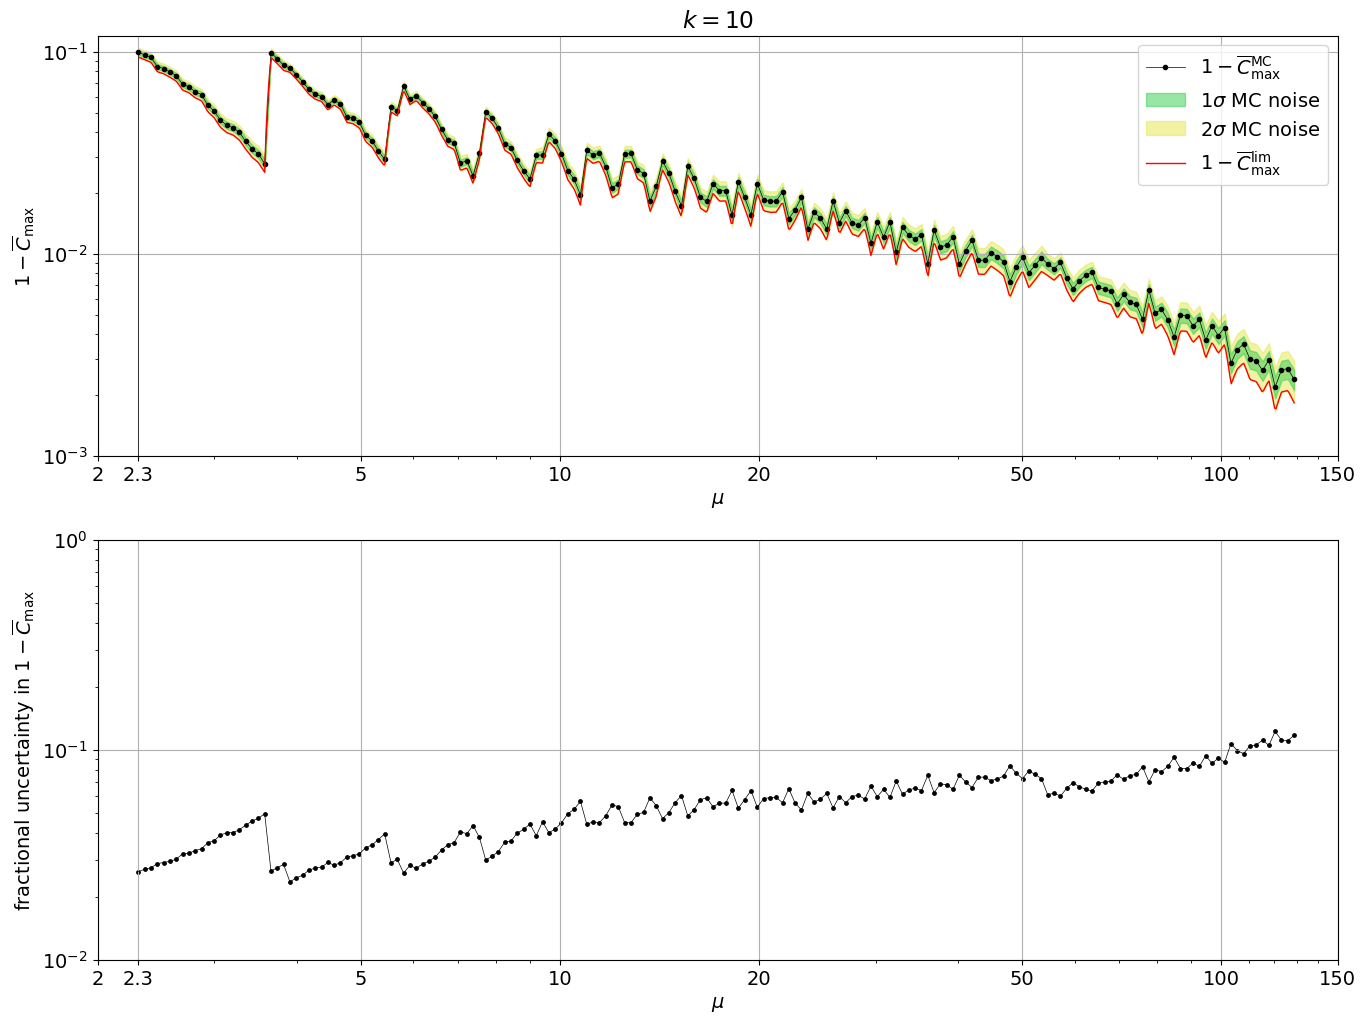

In [7]:
fig,ax = plt.subplots(2,1,figsize=(16,12))
vec_mu_plot = np.logspace(0,np.log10(np.max(df_C_max_bar['mu'])),1000)
ax[0].fill_between(df_C_max_bar['mu'],(1-2*err_frac)*(1-df_C_max_bar['C_max_bar']),(1+2*err_frac)*(1-df_C_max_bar['C_max_bar']),color=(0.9,0.9,0.3,0.5),label=r'$2\sigma$ MC noise')
ax[0].fill_between(df_C_max_bar['mu'],(1-1*err_frac)*(1-df_C_max_bar['C_max_bar']),(1+1*err_frac)*(1-df_C_max_bar['C_max_bar']),color=(0.2,0.8,0.3,0.5),label=r'$1\sigma$ MC noise')
ax[0].plot(df_C_max_bar['mu'],1-df_C_max_bar['C_max_bar'],color='black',marker='.',lw=0.5,label='$1-\overline{C}_\mathrm{max}^\mathrm{MC}$')
ax[0].plot(vec_mu_plot,1-int_C_max_bar_2(vec_mu_plot),color='red',lw=1,label='$1-\overline{C}_\mathrm{max}^\mathrm{lim}$')
#ax[0].plot(df_C_max_bar['mu'],1-int_C_max_bar(df_C_max_bar['mu']),color='blue',lw=3,label='Monte Carlo')
#ax[0].plot(df_C_max_bar['mu'],0.3/df_C_max_bar['mu'])
ax[0].set_ylim(1e-3,1.2e-1);
ax[0].set_ylabel(r'$1-\overline{C}_\mathrm{max}$');
#ax[0].legend(loc='lower left');
ax[0].set_title(r'$k=10$');
ax[1].scatter(df_C_max_bar['mu'],err_frac,color='black',s=6)
ax[1].plot(df_C_max_bar['mu'],err_frac,color='black',lw=0.5)
ax[1].set_ylim(1e-2,1);
ax[1].set_ylabel('fractional uncertainty in $1-\overline{C}_\mathrm{max}$');
for i in [0,1]:
    ax[i].set_xlabel(r'$\mu$'); 
    ax[i].set_xscale('log'); ax[i].set_yscale('log'); ax[i].set_xlim(2,150); 
    x_ticks = [2,2.3,5,10,20,50,100,150]
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels([str(x_tick) for x_tick in x_ticks])
    ax[i].set_xticks(np.concatenate([np.arange(2,10,1.),np.arange(10,150,10.)]),minor=True)
    ax[i].set_xticklabels([],minor=True)
    ax[i].grid()
handles, labels = ax[0].get_legend_handles_labels()
order = [0,3,2,1]
ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order]);